<a href="https://colab.research.google.com/github/Abibsha/Concepts-and-Technologies-of-AI/blob/main/worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3:	To - Do Exercise:**

**Problem - 1: Perform a classification task with knn from scratch.**

1.	Load the Dataset:

  •	Read the dataset into a pandas DataFrame.

  •	Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/diabetes_.csv")

In [ ]:
print("The first few rows:")
df.head()

The first few rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Dataset Info:\n")
display(df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [ ]:
print("Summary Statistics:\n")
display(df.describe())

Summary Statistics:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Missing Values:\n")
display(df.isnull().sum())

Missing Values:



,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


3.	Handle Missing Data:

  • Handle any missing values appropriately, either by dropping or imputing them based on the data.


In [ ]:
missing_info = df.isnull().sum() / len(df) * 100

for column in df.columns:
    if missing_info[column] > 10:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df.dropna(subset=[column], inplace=True)

print("Missing values after handling are:")
print(df.isnull().sum())


Missing values after handling are:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


4.	Feature Engineering:

  •	Separate the feature matrix (X) and target variable (y).
  
  •	Perform a train - test split from scratch using a 70% − 30% ratio.


In [ ]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

In [ ]:
def train_test_split(X, y, test_size=0.3, seed=42):
    np.random.seed(seed)
    idx = np.arange(len(X))
    np.random.shuffle(idx)

    test_len = int(len(X) * test_size)
    test_idx = idx[:test_len]
    train_idx = idx[test_len:]

    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print("Shapes:\n")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes:

X_train: (538, 8)
X_test: (230, 8)
y_train: (538,)
y_test: (230,)


5.	Implement KNN:

  •	Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

  •	Compute distances using Euclidean distance.

  •	Write functions for:

    –	Predicting the class for a single query.

    –	Predicting classes for all test samples.

  • Evaluate the performance using accuracy.


In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [ ]:
def knn_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    k_idx = np.argsort(distances)[:k]
    k_labels = y_train[k_idx]
    prediction = np.bincount(k_labels).argmax()
    return prediction

In [ ]:
def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_single(x, X_train, y_train, k) for x in X_test])


In [ ]:
def compute_accuracy(y_true, y_pred):
    return (np.sum(y_true == y_pred) / len(y_true)) * 100


In [ ]:
pred_unscaled = knn_predict(X_test, X_train, y_train, k=3)
accuracy_unscaled = compute_accuracy(y_test, pred_unscaled)

print(f"The accuracy of performance: {accuracy_unscaled:.2f}%")

The accuracy of performance: 67.39%


**Problem - 2 - Experimentation:**
1. Repeat the Classification Task:

    •	Scale the Feature matrix X.

    •	Use the scaled data for training and testing the kNN Classifier.
    
    •	Record the results.


In [ ]:
X_scale = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scale, y)

pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, pred_scaled)

print(f"Scaled data accuracy is: {accuracy_scaled:.2f}%")


Scaled data accuracy is: 69.13%


2. Comparative Analysis:

    Compare the Results -

      •	Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

      •	Discuss:

    –	How scaling impacted the KNN performance.
    
    –	The reason for any observed changes in accuracy.


In [ ]:
print("Comparison of Results is given below:\n")
print(f"Unscaled Accuracy : {accuracy_unscaled:.2f}%")
print(f"Scaled Accuracy   : {accuracy_scaled:.2f}%")

Comparison of Results is given below:

Unscaled Accuracy : 67.39%
Scaled Accuracy   : 69.13%


**Problem - 3 - Experimentation with k:**

1. Vary the number of neighbors - k:

    •	Run the KNN model on both the original and scaled datasets for a range of:

    k= 1,2,3,...15

    •	For each k, record:

      –	Accuracy.

      –	Time taken to make predictions.


In [ ]:
import time

In [ ]:
k_values = range(1, 16)
accuracy_values = []
time_values = []

for k in k_values:
    start = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k)
    end = time.time()

    acc = compute_accuracy(y_test, predictions)
    accuracy_values.append(acc)
    time_values.append(end - start)

    print(f"Original Data: k={k}, Accuracy: {acc:.2f}%, Time: {end-start:.4f}s")

Original Data: k=1, Accuracy: 68.70%, Time: 0.5824s
Original Data: k=2, Accuracy: 72.61%, Time: 0.5681s
Original Data: k=3, Accuracy: 67.39%, Time: 0.5713s
Original Data: k=4, Accuracy: 72.17%, Time: 0.5550s
Original Data: k=5, Accuracy: 68.70%, Time: 0.5720s
Original Data: k=6, Accuracy: 70.00%, Time: 0.5559s
Original Data: k=7, Accuracy: 69.13%, Time: 0.5702s
Original Data: k=8, Accuracy: 71.30%, Time: 0.5461s
Original Data: k=9, Accuracy: 70.00%, Time: 0.6065s
Original Data: k=10, Accuracy: 71.74%, Time: 0.5510s
Original Data: k=11, Accuracy: 73.04%, Time: 0.5698s
Original Data: k=12, Accuracy: 73.91%, Time: 0.5789s
Original Data: k=13, Accuracy: 74.35%, Time: 0.5557s
Original Data: k=14, Accuracy: 72.61%, Time: 0.5736s
Original Data: k=15, Accuracy: 73.91%, Time: 0.5509s


In [ ]:
accuracy_scaled = []
time_scaled = []

for k in k_values:
    start = time.time()
    predictions = knn_predict(X_test_s, X_train_s, y_train_s, k)
    end = time.time()

    acc = compute_accuracy(y_test_s, predictions)
    accuracy_scaled.append(acc)
    time_scaled.append(end - start)

    print(f"Scaled Data: k={k}, Accuracy: {acc:.2f}%, Time: {end-start:.4f}s")


Scaled Data: k=1, Accuracy: 67.39%, Time: 0.9758s
Scaled Data: k=2, Accuracy: 67.83%, Time: 0.8285s
Scaled Data: k=3, Accuracy: 69.13%, Time: 0.5517s
Scaled Data: k=4, Accuracy: 69.57%, Time: 0.5758s
Scaled Data: k=5, Accuracy: 67.83%, Time: 0.5609s
Scaled Data: k=6, Accuracy: 66.52%, Time: 0.5702s
Scaled Data: k=7, Accuracy: 71.30%, Time: 0.5656s
Scaled Data: k=8, Accuracy: 69.57%, Time: 0.5576s
Scaled Data: k=9, Accuracy: 72.17%, Time: 0.5657s
Scaled Data: k=10, Accuracy: 70.43%, Time: 0.5555s
Scaled Data: k=11, Accuracy: 70.00%, Time: 0.5660s
Scaled Data: k=12, Accuracy: 68.70%, Time: 0.5586s
Scaled Data: k=13, Accuracy: 69.13%, Time: 0.5735s
Scaled Data: k=14, Accuracy: 68.70%, Time: 0.5552s
Scaled Data: k=15, Accuracy: 70.87%, Time: 0.5790s


2. Visualize the Results:

    • Plot the following graphs:

      –	k vs. Accuracy for original and scaled datasets.

      –	k vs. Time Taken for original and scaled datasets.



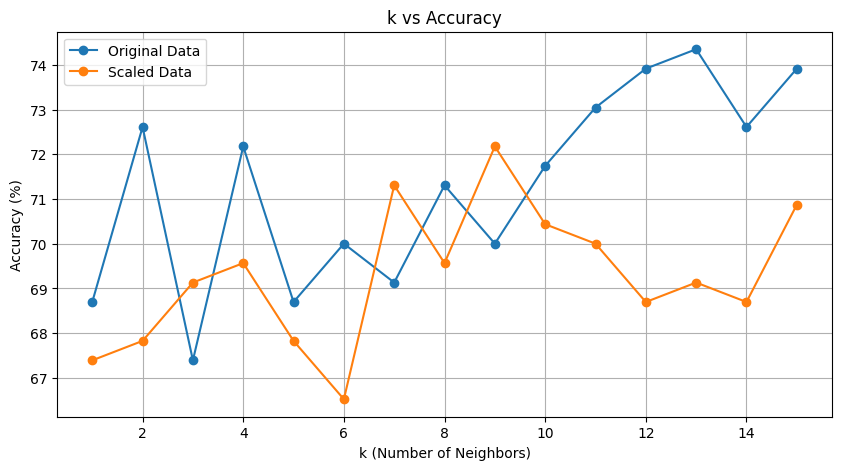

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_values, marker='o', label="Original Data")
plt.plot(k_values, accuracy_scaled, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("k vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


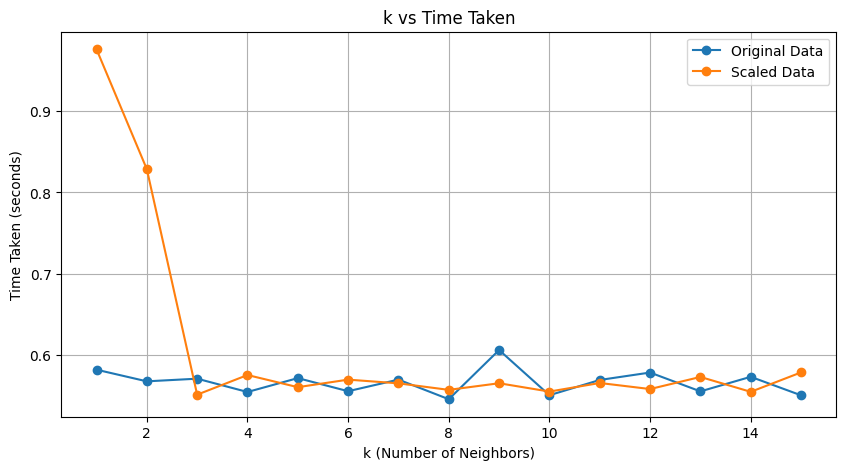

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_values, time_values, marker='o', label="Original Data")
plt.plot(k_values, time_scaled, marker='o', label="Scaled Data")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("k vs Time Taken")
plt.legend()
plt.grid(True)
plt.show()


3. Analyze and Discuss:

    •	Discuss how the choice of k affects the accuracy and computational cost.
    
    •	Identify the optimal k based on your analysis.

In [ ]:
optimal_k_original = k_values[np.argmax(accuracy_values)]
max_acc_original = max(accuracy_values)

optimal_k_scaled = k_values[np.argmax(accuracy_scaled)]
max_acc_scaled = max(accuracy_scaled)

print("Optimal k Analysis is given below:\n")
print(f"Original Data: Optimal k = {optimal_k_original}, Accuracy: {max_acc_original:.2f}%")
print(f"Scaled Data: Optimal k = {optimal_k_scaled}, Accuracy: {max_acc_scaled:.2f}%")


Optimal k Analysis is given below:

Original Data: Optimal k = 13, Accuracy: 74.35%
Scaled Data: Optimal k = 9, Accuracy: 72.17%
